<a href="https://colab.research.google.com/github/John-Testx/Titanic_case_collab/blob/main/Trabajo_1_AI_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Kaggle

Cargar dataset y librerias:
- Pandas
- Gráficos matplot, seaborn

Leer dataset posteriormente usando pandas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
datos = pd.read_csv("train.csv")

# Investigar dataset

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Entre las variables más importantes se puede mencionar:

- pclass: Indicador del nivel socioeconómico (NSE)
  - 1.º = Alto
  - 2.º = Medio
  - 3.º = Bajo

- sibsp: El conjunto de datos define las relaciones familiares de esta manera:
  - Sibling = hermano, hermana, hermanastro, hermanastra
  - Spouse = esposo, esposa (se ignoraron amantes y prometidos)

- parch:
  - El conjunto de datos define las relaciones familiares de esta manera:
    - Parent = madre, padre
    - Child = hija, hijo, hijastra, hijastro
    - Algunos niños viajaron solo con una niñera, por lo que parch=0 para ellos.

# Verificar medidas estadisticas en variables o columnas del dataset

In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Verificar gráfico que muestra la cantidad de supervivientes en el caso titanic.

<Axes: xlabel='Survived', ylabel='count'>

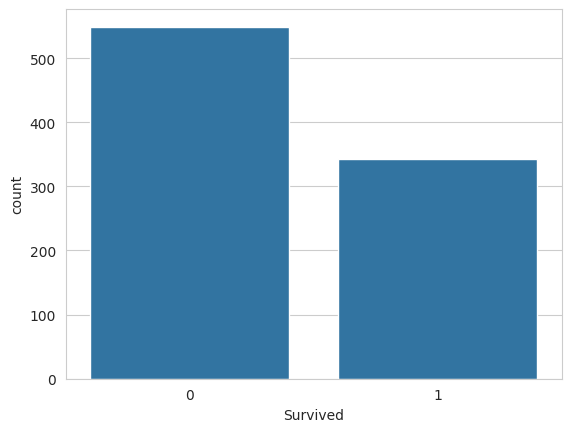

In [ ]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

La mayoría de personas murieron o no sobrevivió. No es muy especifico si no se utilizan otros factores (edad, sexo, etc.)

# Verificar gráfico que muestra la cantidad de supervivientes por género

<Axes: xlabel='Survived', ylabel='count'>

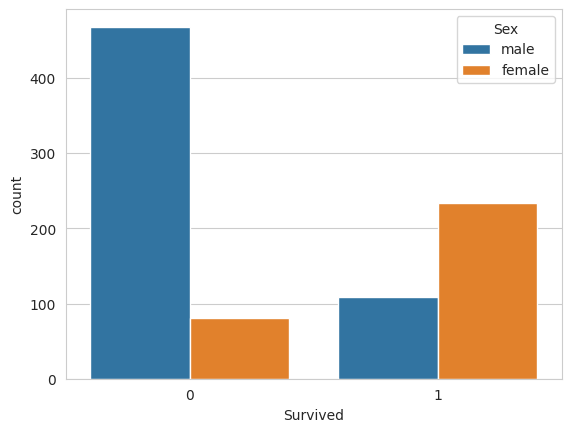

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Sex")

La mayor cantidad de muertes o la mortalidad fue en hombres comparado al sexo femenino.

# Verificar si hay valores nulos en cada columna del DataFrame

In [ ]:

datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Entre las propiedades o variables, que poseen datos nulos están la edad, la cabina y el punto donde se embarcaron algunos de los pasajeros. La edad en especial que muestra que al menos 177 pasajeros no poseen una edad definida.

# Crear un histograma para visualizar la distribución de la columna 'Age'

- Se utiliza seaborn para crear el gráfico de distribución (displot), 'x="Age"' para colocar la edad en el eje x.

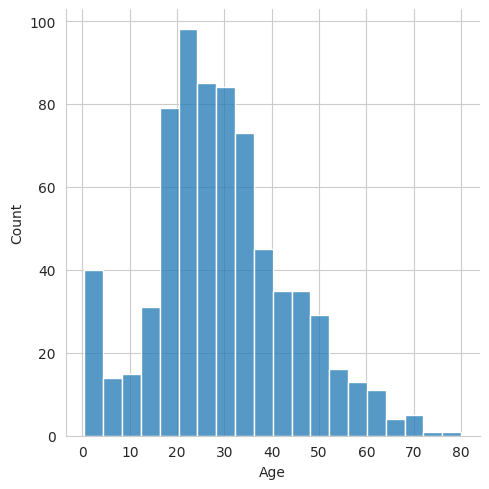

In [ ]:
sb.displot(x="Age", data=datos)

Los rangos de edad de los pasajeros estan mayormente distribuidos entre los 20-40 años.

# Verificar y mostrar la columna 'Age'


In [ ]:

datos["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Se comprueba tal como en el datos.describe() que el dataset posee supervivientes sin edad aparente lo cual necesita ser estudiado.

# Edad promedio de los supervivientes

In [ ]:
datos["Age"].mean()

np.float64(29.69911764705882)

La edad promedio de los pasajeros ronda los 29 años de edad.

# Limpiar valores nulos (Nan, None)

In [ ]:
datos["Age"].fillna(datos["Age"].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


Los pasajeros que no poseen una edad valida fueron establecidos con la edad promedio del resto de la tripulación que es de 29 años.

# Verificar si hay pasajeros con edad nula

In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

Se ingresa la edad promedio de los pasajeros del barco a pasajeros sin edad aparente.

In [ ]:
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


Se verifica que ahora si no hay valores nulos.
Los 891 pasajeros tienen edad.

In [ ]:
min_age= datos["Age"].min()
max_age= datos["Age"].max()
print(f"Edad mínima: {min_age}")
print(f"Edad máxima: {max_age}")

Edad mínima: 0.42
Edad máxima: 80.0


Se calcula y muestra la edad mínima y máxima en la columna 'Age' después de haber rellenado los valores nulos, se estipula o se observa que hay bebes y gente de mayor edad abordo del barco.

# Histograma de edades más específico

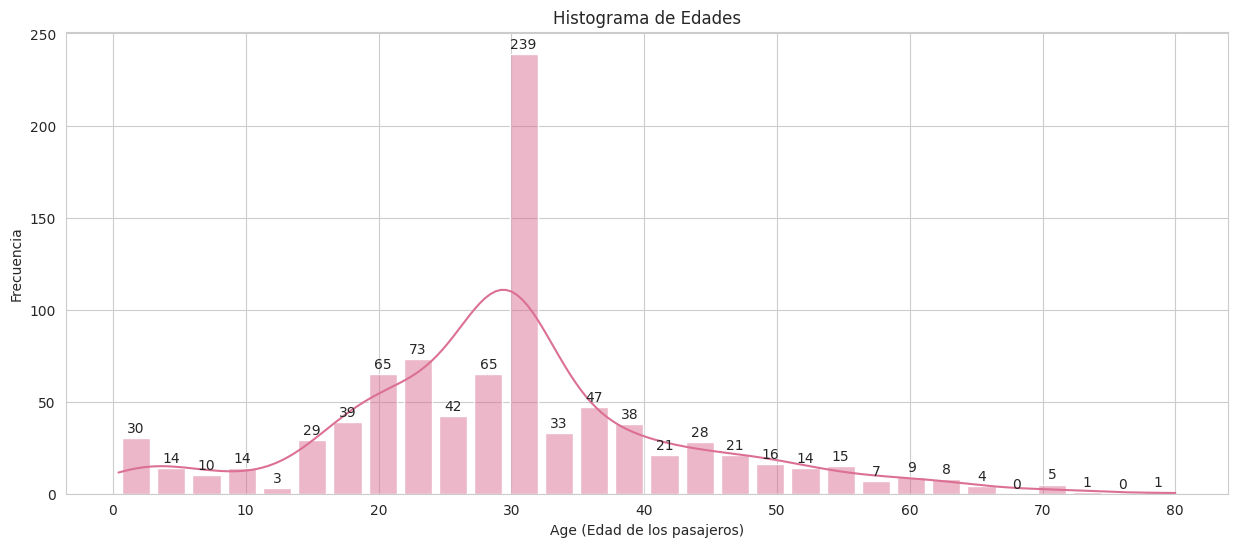

In [ ]:

sns.set_style("whitegrid")

# Histograma de Edades
plt.figure(figsize=(15, 6))
ax = sns.histplot(data=datos, x='Age', color='palevioletred', kde=True, shrink=.8)
plt.title('Histograma de Edades')
plt.xlabel('Age (Edad de los pasajeros)')
plt.ylabel('Frecuencia')
for container in ax.containers:
    ax.bar_label(container, padding=2)
plt.show()

La edad de los pasajeros ronda mayormente entre los 20 y 40 años.
El hecho de haber ajustado a los pasajeros sin edad a utilizar la edad promedio hizo que la cantidad de personas con la edad de 29 años escalará mucho.

# Verificar otras columnas con datos nulos

In [ ]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Se observa que más de la mitad de los pasajeros no poseen un cuarto o habitación registrado. Y una cantidad de dos pasajeros no poseen datos de en que punto se embarcaron podrían posiblemente ser gente de clase baja.

# Descartar la columna o variable "Cabin"

El hecho de que la mayoría de pasajeros no tenga un cuarto o habitación, no es muy relevante para este estudio ya que se estudiará si el pasajero sobrevivió a partir de su género, edad o clase.

In [ ]:
datos = datos.drop(["Cabin"], axis=1)

Así que como entre las variables con mayor datos nulos esta la cabina o cuarto donde se hospedaban, este dato no se utilizará así que se remueve.

In [ ]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


Entre las tres ciudades donde se embarcaron los pasajeros:
C = Cherbourg, Q = Queenstown, S = Southampton

La mayoría de pasajeros se embarcaron en Southampton.

In [ ]:
datos = datos.dropna()

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [ ]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

get_dummies() se utilizó para convertir la variable de sexo (female,male) para convertir los valores de tipo categorico a numero binarios de 0 y 1.

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

# Observar supervivencia por punto de embarque y sexo.

<Axes: xlabel='Survived', ylabel='count'>

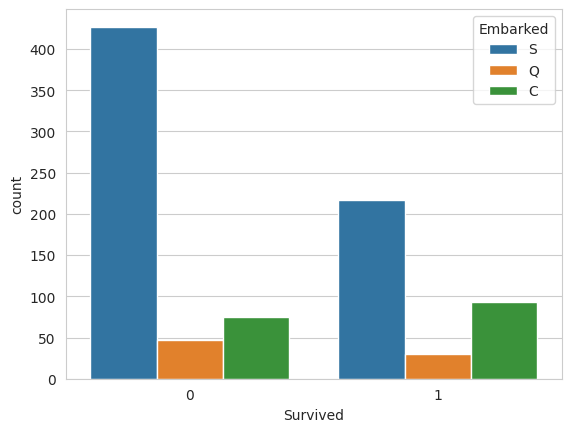

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [ ]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

Los valores en punto de embarque se cambiaron con get_dummies() a columnas con valores binarios que representan el si subieron en ese ciudad o no.

In [ ]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

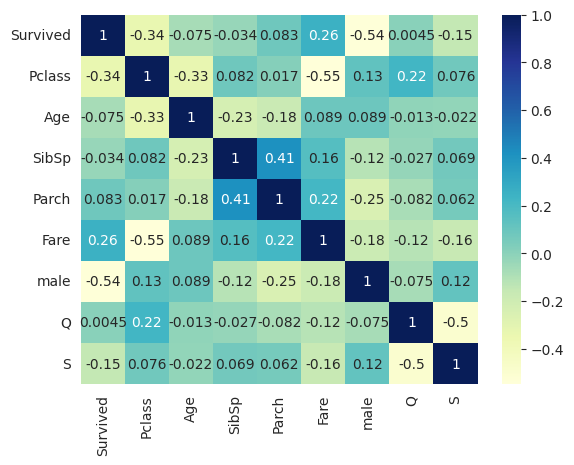

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

El mapa indica que la corelación más grande es la de los miembros de la familia del pasajero con (número de padres/niños a bordo con hermanos y esposos/as).


También el siguiente coeficiente correlación más grande es el de Parch/SibSp con tarifa o boleto, lo cual tiene cierto sentido sabiendo que mientras más miembros o gente poseía la familia estos pagaban un precio más alto por todos ellos.

Los demás indices con menor valor son:

- Con la clase del pasajero y el punto de embarque de QueensTown este es de un 0.22 podría representar que quizás una clase más baja/más alta se subio especificamente en QueensTown.

- También esta el indice de 0.26 entre tarifa/boleto y supervivencia, que quizás indica que el hecho de poseer un boleto si afecto la posibilidad de que estos pasajeros pudieran sobrevivir.


---


El color map es de Amarillo,Verde y Azul.
El coeficiente de correlación que utiliza heat-map en este caso como matriz de correlación, es el método .corr() de Pandas que calcula esto usando el coeficiente de relación de Pearson.

<Axes: xlabel='Survived', ylabel='count'>

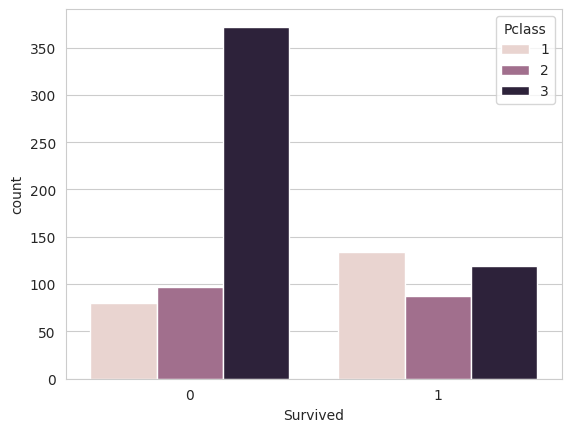

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

# Arbol decisión

> Nota: Pensaba modificar el arbol de decisión que venía por defecto en el trabajo original pero la verdad no se si estuviera mal hacerlo, decidí dejarlo así y después incluir en manera más simple los otros modelos o algoritmos (Random Forest, Naive Bayes) para así después calcular la precisión de todos estos algoritmos.

In [ ]:
variable_explicativa = datos.drop(["Survived"], axis=1)
variable_objetivo = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(variable_explicativa, variable_objetivo, test_size=.2)

- X_ent: Las características del conjunto de entrenamiento.
- X_pru: Las características del conjunto de prueba.
- y_ent: La variable objetivo del conjunto de entrenamiento.
- y_pru: La variable objetivo del conjunto de prueba.

Preparando el modelo para observar que nivel de precisión hay con 10 niveles de profundidad.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.848314606741573

# Verificando nivel de precisión de arbol de decisión (nivel de profundidad del 1 al 15)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.797752808988764
Resultado para 2: 0.7921348314606742
Resultado para 3: 0.8202247191011236
Resultado para 4: 0.8146067415730337
Resultado para 5: 0.8146067415730337
Resultado para 6: 0.8089887640449438
Resultado para 7: 0.8370786516853933
Resultado para 8: 0.8539325842696629
Resultado para 9: 0.8595505617977528
Resultado para 10: 0.8426966292134831
Resultado para 11: 0.8426966292134831
Resultado para 12: 0.8370786516853933
Resultado para 13: 0.8426966292134831
Resultado para 14: 0.8370786516853933


<Axes: >

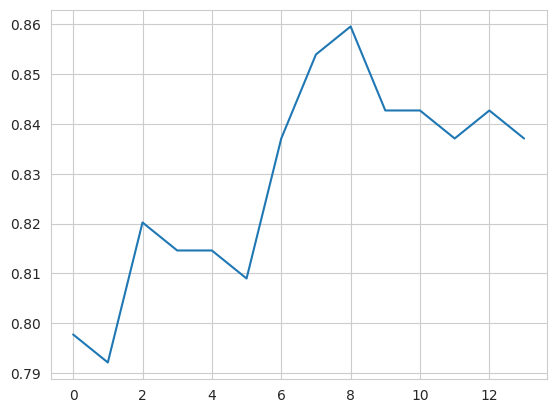

In [ ]:
sb.lineplot(data=resultados)

# Medir precisión de Arbol de decisión

In [ ]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.88      0.74      0.80        76

    accuracy                           0.84       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.84      0.84       178



In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,94,8
Real: Si,20,56


In [ ]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

# Visualizar modelo

[Text(0.41910601265822783, 0.9444444444444444, 'male <= 0.5\n0.467\n711\n[447, 264]\nMurió'),
 Text(0.2579113924050633, 0.8333333333333334, 'Pclass <= 2.5\n0.391\n236\n[63, 173]\nVivió'),
 Text(0.33850870253164556, 0.8888888888888888, 'True  '),
 Text(0.13291139240506328, 0.7222222222222222, 'Age <= 56.0\n0.096\n119\n[6, 113]\nVivió'),
 Text(0.10126582278481013, 0.6111111111111112, 'Fare <= 28.856\n0.082\n116\n[5, 111]\nVivió'),
 Text(0.0759493670886076, 0.5, 'Fare <= 28.231\n0.159\n46\n[4, 42]\nVivió'),
 Text(0.06329113924050633, 0.3888888888888889, 'Age <= 27.5\n0.124\n45\n[3, 42]\nVivió'),
 Text(0.05063291139240506, 0.2777777777777778, 'Age <= 25.5\n0.266\n19\n[3, 16]\nVivió'),
 Text(0.02531645569620253, 0.16666666666666666, 'Fare <= 13.75\n0.117\n16\n[1, 15]\nVivió'),
 Text(0.012658227848101266, 0.05555555555555555, '0.278\n6\n[1, 5]\nVivió'),
 Text(0.0379746835443038, 0.05555555555555555, '0.0\n10\n[0, 10]\nVivió'),
 Text(0.0759493670886076, 0.16666666666666666, 'S <= 0.5\n0.444\n

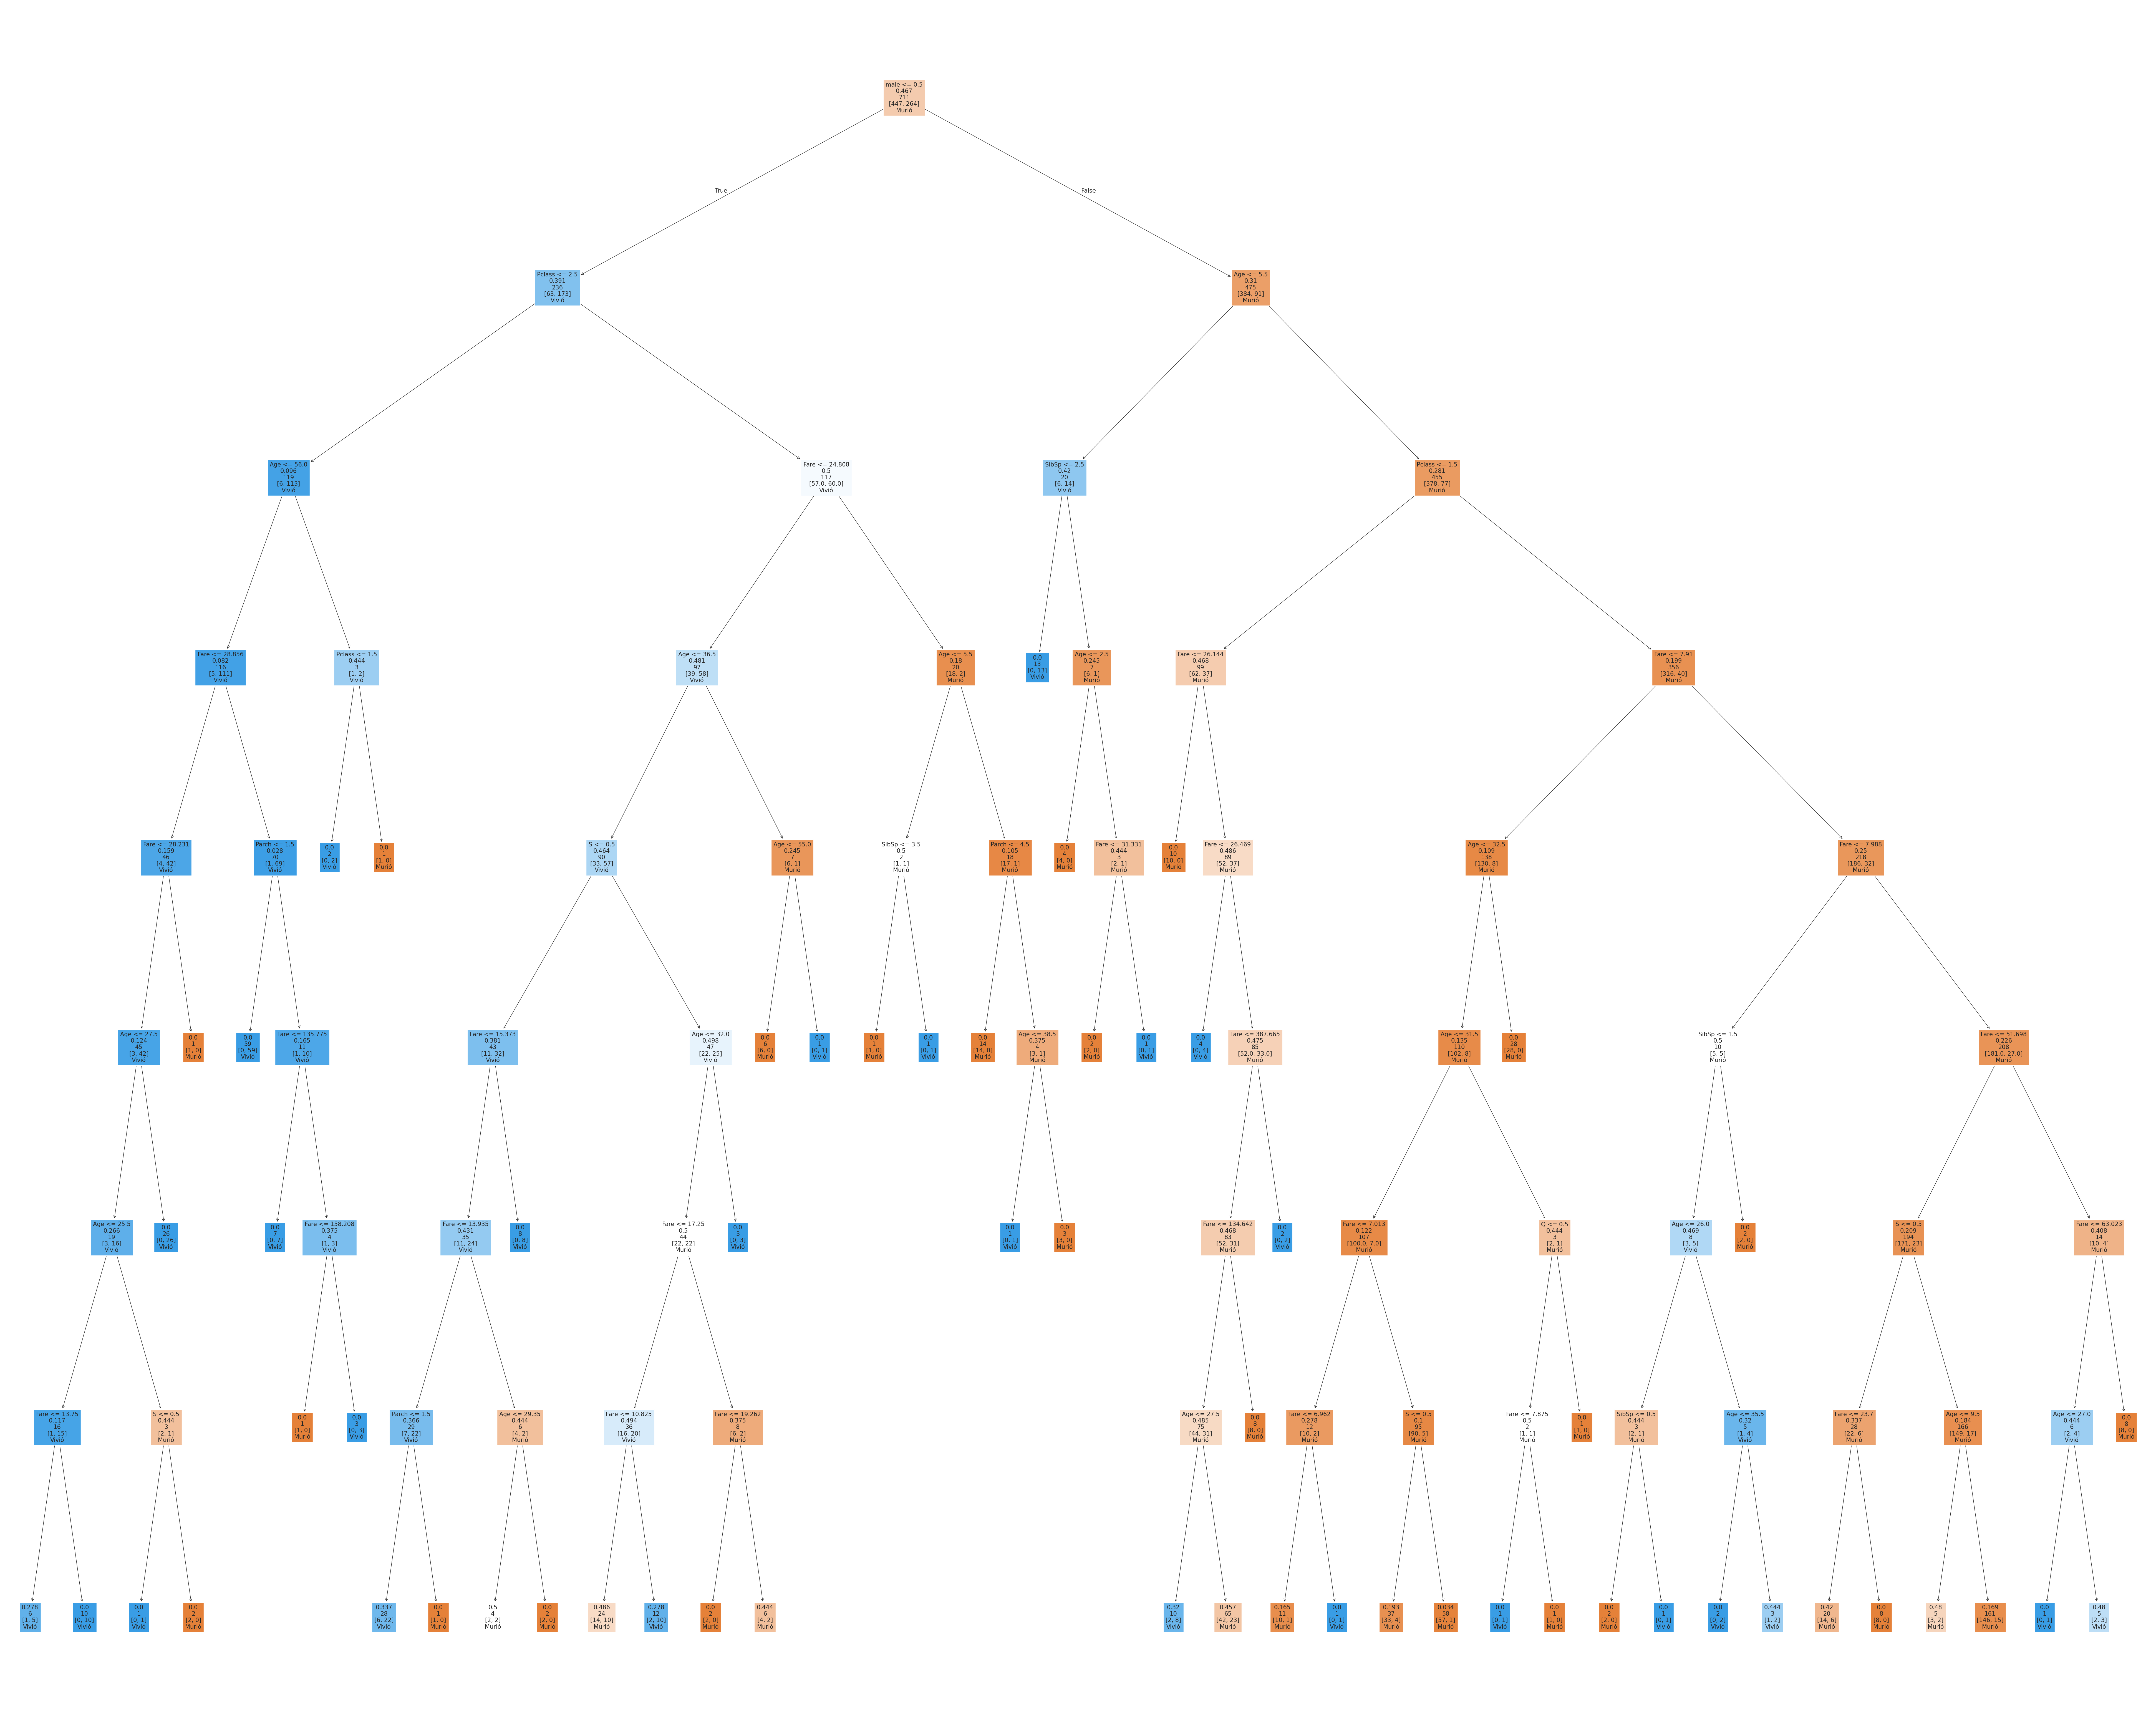

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

El arbol en general con 8 niveles es bastante dificil de estudiar por lo cual se utilizará un nivel de profundidad con mayor precisión (accuracy) y a un nivel más bajo.

In [ ]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

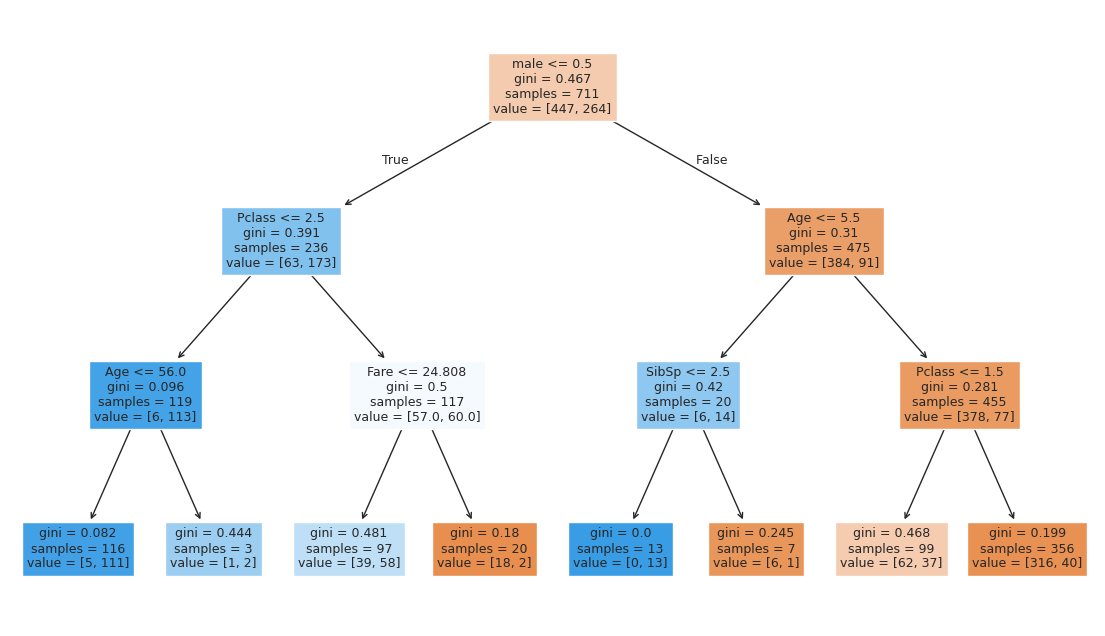

In [ ]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree=modelo,feature_names=variable_explicativa.columns, filled=True);

In [ ]:
a=variable_explicativa.sample()
a

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
10,3,4.0,1,1,16.7,False,False,True


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8426966292134831

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.88      0.74      0.80        76

    accuracy                           0.84       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.84      0.84       178



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[94,  8],
       [20, 56]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,94,8
Real: Si,20,56


In [ ]:
variable_explicativa.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


# Predicción con arbol de decisión

In [ ]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
modelo_rf.fit(X_ent, y_ent)

# Make predictions
predicciones_rf = modelo_rf.predict(X_pru)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

exactitud_rf = accuracy_score(y_pru, predicciones_rf)
print(f"Exactitud del modelo Random Forest: {exactitud_rf}")

print("\nInforme de clasificación:")
print(classification_report(y_pru, predicciones_rf))

print("\nMatriz de confusión:")
print(confusion_matrix(y_pru, predicciones_rf))

Exactitud del modelo Random Forest: 0.8426966292134831

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       102
           1       0.83      0.79      0.81        76

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178


Matriz de confusión:
[[90 12]
 [16 60]]


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
modelo_nb = GaussianNB()

# Train the model
modelo_nb.fit(X_ent, y_ent)

# Make predictions
predicciones_nb = modelo_nb.predict(X_pru)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

exactitud_nb = accuracy_score(y_pru, predicciones_nb)
print(f"Exactitud del modelo Naive Bayes: {exactitud_nb}")

print("\nInforme de clasificación:")
print(classification_report(y_pru, predicciones_nb))

print("\nMatriz de confusión:")
print(confusion_matrix(y_pru, predicciones_nb))

Exactitud del modelo Naive Bayes: 0.7696629213483146

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       102
           1       0.72      0.76      0.74        76

    accuracy                           0.77       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.77      0.77       178


Matriz de confusión:
[[79 23]
 [18 58]]


# Comparación del rendimiento del modelo
A continuación se muestra una comparación de las métricas de rendimiento para los modelos de árbol de decisiones (con `max_depth=3` y `max_depth=8`), Random Forest y Naive Bayes:

| Model                      | Accuracy | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------------|----------|---------------------|------------------|--------------------|---------------------|------------------|--------------------|
| Decision Tree (Depth 3)    | ~0.820   | ~0.82               | ~0.92            | ~0.87              | ~0.88               | ~0.74            | ~0.80              |
| Decision Tree (Depth 8)    | ~0.843   | ~0.82               | ~0.92            | ~0.87              | ~0.88               | ~0.74            | ~0.80              |
| Random Forest              | ~0.843   | ~0.85               | ~0.88            | ~0.87              | ~0.83               | ~0.79            | ~0.81              |
| Naive Bayes                | ~0.770   | ~0.81               | ~0.77            | ~0.79              | ~0.72               | ~0.76            | ~0.74              |

Al observar las puntuaciones de precisión, tanto el modelo de Árbol de Decisión con profundidad 8 como el de Bosque Aleatorio obtuvieron la mayor precisión en este conjunto de pruebas (0,843). El modelo Naive Bayes tuvo una precisión menor (0,770).

Con base en estas métricas, el modelo de Árbol de Decisión con profundidad 8 y el de Bosque Aleatorio parecen ser los modelos con mejor rendimiento en este conjunto de datos; el de Bosque Aleatorio muestra una recuperación ligeramente mejor para la clase 1 (sobrevivientes). El rendimiento del modelo Naive Bayes es notablemente inferior.


# Calculo de precisión de cada modelo

In [ ]:
# Decision Tree (max_depth=8)
print("--- Decision Tree (max_depth=8) ---")
print(f"Accuracy: {accuracy_score(y_pru, modelo.predict(X_pru))}")
print("\nClassification Report:")
print(classification_report(y_pru, modelo.predict(X_pru)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_pru, modelo.predict(X_pru)))
print("-" * 30)

--- Decision Tree (max_depth=8) ---
Accuracy: 0.8202247191011236

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       102
           1       0.80      0.78      0.79        76

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.82      0.82      0.82       178


Confusion Matrix:
[[87 15]
 [17 59]]
------------------------------


In [ ]:
# Random Forest
print("--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_pru, modelo_rf.predict(X_pru))}")
print("\nClassification Report:")
print(classification_report(y_pru, modelo_rf.predict(X_pru)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_pru, modelo_rf.predict(X_pru)))
print("-" * 30)

--- Random Forest ---
Accuracy: 0.8426966292134831

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       102
           1       0.83      0.79      0.81        76

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178


Confusion Matrix:
[[90 12]
 [16 60]]
------------------------------


In [ ]:
# Naive Bayes
print("--- Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_pru, modelo_nb.predict(X_pru))}")
print("\nClassification Report:")
print(classification_report(y_pru, modelo_nb.predict(X_pru)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_pru, modelo_nb.predict(X_pru)))
print("-" * 30)

--- Naive Bayes ---
Accuracy: 0.7696629213483146

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       102
           1       0.72      0.76      0.74        76

    accuracy                           0.77       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.77      0.77       178


Confusion Matrix:
[[79 23]
 [18 58]]
------------------------------


# Comparación Gráfica de Métricas de Modelos

A continuación, se presenta una comparación visual de algunas métricas clave para los modelos de Árbol de Decisión (se utilizo el arbol original de nivel de profundidad 8), Random Forest y Naive Bayes.

### Explicación de las Métricas

Explicación de las métricas utilizadas para evaluar los modelos:

*   **Accuracy (Exactitud):** Qué porcentaje de todas las predicciones fueron correctas.
*   **Precision (Precisión):** La Precisión te dice qué porcentaje de esas personas que el modelo dijo que sobrevivieron, realmente sobrevivieron.

*   **Recall (Sensibilidad o Exhaustividad):** El Recall te dice qué porcentaje de esas personas que realmente sobrevivieron, el modelo fue capaz de identificar correctamente
*   **F1-Score (Puntuación F1):** Un balance entre qué tan preciso fue el modelo y cuántos casos reales encontró.

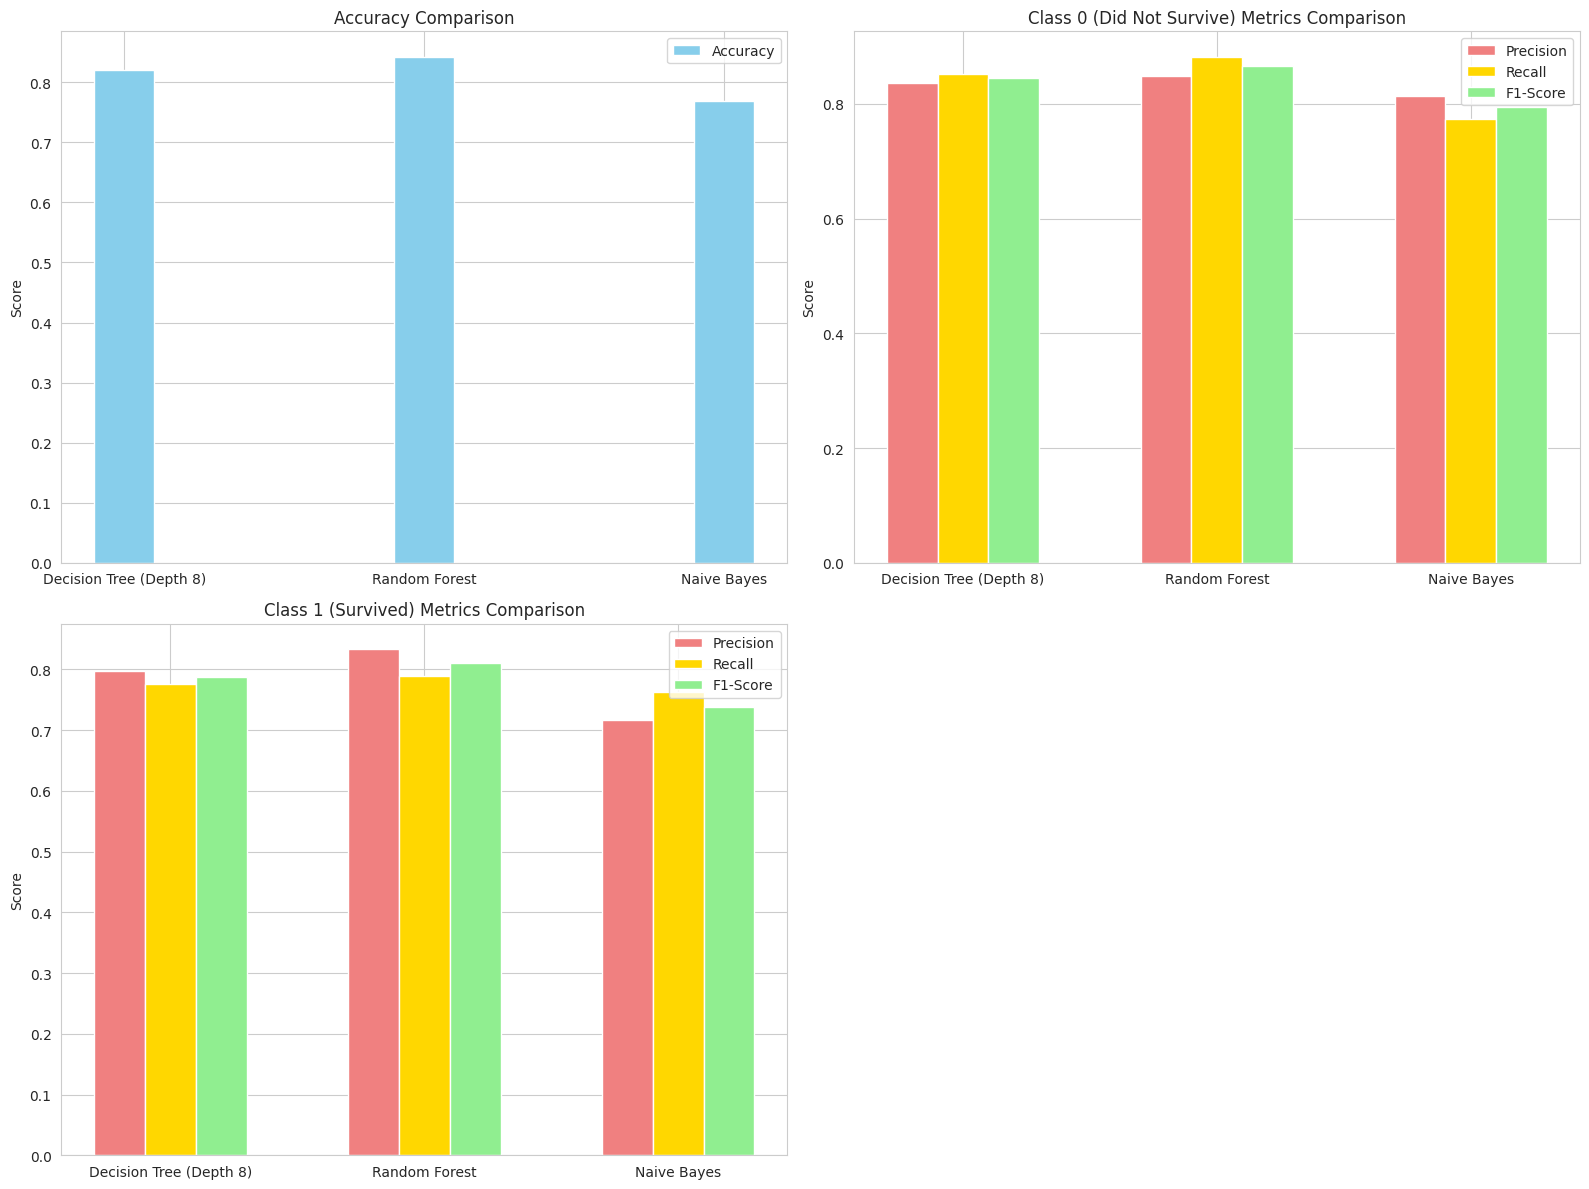

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metricas de cada modelo hecho
dt_accuracy = accuracy_score(y_pru, modelo.predict(X_pru))
dt_report = classification_report(y_pru, modelo.predict(X_pru), output_dict=True)

rf_accuracy = accuracy_score(y_pru, modelo_rf.predict(X_pru))
rf_report = classification_report(y_pru, modelo_rf.predict(X_pru), output_dict=True)

nb_accuracy = accuracy_score(y_pru, modelo_nb.predict(X_pru))
nb_report = classification_report(y_pru, modelo_nb.predict(X_pru), output_dict=True)

# Extraer metricas de cada modelo para utilizar en las gráficas
# Metricas sobre si sobre si sobrevivió o no sobrevivió

models = ['Decision Tree (Depth 8)', 'Random Forest', 'Naive Bayes']
accuracy_scores = [dt_accuracy, rf_accuracy, nb_accuracy]
precision_class0 = [dt_report['0']['precision'], rf_report['0']['precision'], nb_report['0']['precision']]
recall_class0 = [dt_report['0']['recall'], rf_report['0']['recall'], nb_report['0']['recall']]
f1_class0 = [dt_report['0']['f1-score'], rf_report['0']['f1-score'], nb_report['0']['f1-score']]
precision_class1 = [dt_report['1']['precision'], rf_report['1']['precision'], nb_report['1']['precision']]
recall_class1 = [dt_report['1']['recall'], rf_report['1']['recall'], nb_report['1']['recall']]
f1_class1 = [dt_report['1']['f1-score'], rf_report['1']['f1-score'], nb_report['1']['f1-score']]


# graficar modelos
x = np.arange(len(models)) # Las etiquetas de cada modelo
width = 0.2

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de precisión
ax[0, 0].bar(x, accuracy_scores, width, label='Accuracy', color='skyblue')
ax[0, 0].set_ylabel('Score')
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].legend()

# Metricas para gráficas medir las metricas sobre si el pasajero no sobrevió
rects1 = ax[0, 1].bar(x - width, precision_class0, width, label='Precision', color='lightcoral')
rects2 = ax[0, 1].bar(x, recall_class0, width, label='Recall', color='gold')
rects3 = ax[0, 1].bar(x + width, f1_class0, width, label='F1-Score', color='lightgreen')
ax[0, 1].set_ylabel('Score')
ax[0, 1].set_title('Class 0 (Did Not Survive) Metrics Comparison')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()

# Metricas para gráficas medir las metricas sobre si el pasajero sobrevió
rects4 = ax[1, 0].bar(x - width, precision_class1, width, label='Precision', color='lightcoral')
rects5 = ax[1, 0].bar(x, recall_class1, width, label='Recall', color='gold')
rects6 = ax[1, 0].bar(x + width, f1_class1, width, label='F1-Score', color='lightgreen')
ax[1, 0].set_ylabel('Score')
ax[1, 0].set_title('Class 1 (Survived) Metrics Comparison')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()

# Deshacerse del grafico vacio de la esquina derecha
fig.delaxes(ax[1, 1])

plt.tight_layout()
plt.show()

# Conclusión

Se manejaron los datos faltantes (especialmente en 'Age' y 'Cabin') y se convirtieron las variables categóricas ('Sex' y 'Embarked') a formato numérico para los modelos. La exploración de los datos y los gráficos mostraron que el sexo (ser mujer) y la clase del pasajero (clases más altas) estaban fuertemente relacionados con una mayor probabilidad de supervivencia.


Se implementaron y evaluaron tres modelos Árbol de Decisión, Random Forest y Naive Bayes, al comparar las métricas (como la exactitud), el Árbol de Decisión (con profundidad 8) y el modelo Random Forest tuvieron el mejor rendimiento en este conjunto de datos de prueba, siendo ligeramente superiores al modelo Naive Bayes.

En conclusión, este análisis confirma que factores como la clase y el sexo fueron muy importantes para la supervivencia en el Titanic.